In [8]:
!pip install fredapi > /dev/null

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns',500)
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color'] 

from fredapi import Fred

fred_key='eb7a9cd1836c94fafede6bdfaa497939'

# Create a Fred Object

In [5]:
fred= Fred(api_key=fred_key)

# Search for economic data

In [7]:
sp_search=fred.search('S&P',order_by='popularity')

In [25]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-11-30   2024-11-30   
CSUSHPINSA          CSUSHPINSA     2024-11-30   2024-11-30   
SP500                    SP500     2024-11-30   2024-11-30   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-11-30   2024-11-30   
BAMLC0A0CM          BAMLC0A0CM     2024-11-30   2024-11-30   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
BAMLC0A0CM      ICE BofA US Corporate Index Option-Adjusted Sp...   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-11-28  Daily, Close   
CSUSHPINSA            1987-01-01      2024-09-01       Monthly   
SP500                 2014-12-01      2024-11-29  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2024-11-28  Daily, Close   
BAMLC0A0CM            1996-12-31      2024-11-28  Daily, Close   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
BAMLC0A0CM                   D             Percent                   %   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
BAMLC0A0CM      Not Seasonally Adjusted                       NSA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2024-11-29 10:59:06-06:00         92   
CSUSHPINSA      2024-11-26 08:12:02-06:00         88   
SP500           2024-11-29 19:11:37-06:00         83   
BAMLH0A0HYM2EY  2024-11-29 10:59:09-06:00         82   
BAMLC0A0CM      2024-11-29 11:06:02-06:00         78   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
BAMLC0A0CM      The ICE BofA Option-Adjusted Spreads (OASs) ar...

# Pull Raw Data & Plot

In [9]:
sp500=fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

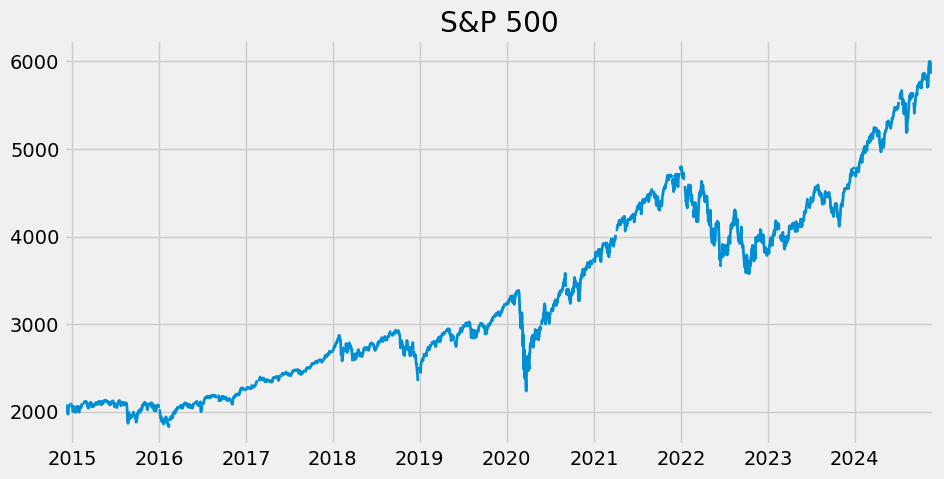

In [11]:
sp500.plot(figsize=(10,5),title='S&P 500', lw=2)

# Pull and Join multiple Data Series

In [13]:
unemp_results=fred.search('unemployment')

In [221]:
unrate=fred.get_series(series_id='UNRATE')

unemp_df=fred.search('unemployment rate state',filter=('frequency','Monthly'))
unemp_df=unemp_df.query('seasonal_adjustment =="Seasonally Adjusted" and units=="Percent" and id.str.len() <= 4')

In [223]:
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

id realtime_start realtime_end  \
series id                                     
CAUR       CAUR     2024-11-30   2024-11-30   
TXUR       TXUR     2024-11-30   2024-11-30   
NYUR       NYUR     2024-11-30   2024-11-30   
FLUR       FLUR     2024-11-30   2024-11-30   
PAUR       PAUR     2024-11-30   2024-11-30   
OHUR       OHUR     2024-11-30   2024-11-30   
MIUR       MIUR     2024-11-30   2024-11-30   
ALUR       ALUR     2024-11-30   2024-11-30   
MAUR       MAUR     2024-11-30   2024-11-30   
NCUR       NCUR     2024-11-30   2024-11-30   
ILUR       ILUR     2024-11-30   2024-11-30   
NJUR       NJUR     2024-11-30   2024-11-30   
GAUR       GAUR     2024-11-30   2024-11-30   
COUR       COUR     2024-11-30   2024-11-30   
AZUR       AZUR     2024-11-30   2024-11-30   
WIUR       WIUR     2024-11-30   2024-11-30   
VAUR       VAUR     2024-11-30   2024-11-30   
KYUR       KYUR     2024-11-30   2024-11-30   
SCUR       SCUR     2024-11-30   2024-11-30   
NMUR       NMUR     2024-11-30   2024-11-30   
MNUR       MNUR     2024-11-30   2024-11-30   
TNUR       TNUR     2024-11-30   2024-11-30   
WAUR       WAUR     2024-11-30   2024-11-30   
MDUR       MDUR     2024-11-30   2024-11-30   
ORUR       ORUR     2024-11-30   2024-11-30   
WVUR       WVUR     2024-11-30   2024-11-30   
NVUR       NVUR     2024-11-30   2024-11-30   
ARUR       ARUR     2024-11-30   2024-11-30   
OKUR       OKUR     2024-11-30   2024-11-30   
MOUR       MOUR     2024-11-30   2024-11-30   
AKUR       AKUR     2024-11-30   2024-11-30   
IAUR       IAUR     2024-11-30   2024-11-30   
UTUR       UTUR     2024-11-30   2024-11-30   
PRUR       PRUR     2024-11-30   2024-11-30   
INUR       INUR     2024-11-30   2024-11-30   
LAUR       LAUR     2024-11-30   2024-11-30   
HIUR       HIUR     2024-11-30   2024-11-30   
NDUR       NDUR     2024-11-30   2024-11-30   
MTUR       MTUR     2024-11-30   2024-11-30   
DCUR       DCUR     2024-11-30   2024-11-30   
MSUR       MSUR     2024-11-30   2024-11-30   
MEUR       MEUR     2024-11-30   2024-11-30   
NEUR       NEUR     2024-11-30   2024-11-30   
CTUR       CTUR     2024-11-30   2024-11-30   
IDUR       IDUR     2024-11-30   2024-11-30   
NHUR       NHUR     2024-11-30   2024-11-30   
RIUR       RIUR     2024-11-30   2024-11-30   
KSUR       KSUR     2024-11-30   2024-11-30   
WYUR       WYUR     2024-11-30   2024-11-30   
DEUR       DEUR     2024-11-30   2024-11-30   
VTUR       VTUR     2024-11-30   2024-11-30   
SDUR       SDUR     2024-11-30   2024-11-30   

                                                   title observation_start  \
series id                                                                    
CAUR                     Unemployment Rate in California        1976-01-01   
TXUR                          Unemployment Rate in Texas        1976-01-01   
NYUR                       Unemployment Rate in New York        1976-01-01   
FLUR                        Unemployment Rate in Florida        1976-01-01   
PAUR                   Unemployment Rate in Pennsylvania        1976-01-01   
OHUR                           Unemployment Rate in Ohio        1976-01-01   
MIUR                       Unemployment Rate in Michigan        1976-01-01   
ALUR                        Unemployment Rate in Alabama        1976-01-01   
MAUR                  Unemployment Rate in Massachusetts        1976-01-01   
NCUR                 Unemployment Rate in North Carolina        1976-01-01   
ILUR                       Unemployment Rate in Illinois        1976-01-01   
NJUR                     Unemployment Rate in New Jersey        1976-01-01   
GAUR                        Unemployment Rate in Georgia        1976-01-01   
COUR                       Unemployment Rate in Colorado        1976-01-01   
AZUR                        Unemployment Rate in Arizona        1976-01-01   
WIUR                      Unemployment Rate in Wisconsin        1976-01-01   
VAUR                       Unemployment Rate in Virginia        1976-0

In [141]:
unemp_df.shape

(52, 15)

In [225]:
all_results=[]

for my_id in unemp_df.index:
    results=fred.get_series(my_id)
    results=results.to_frame(name=my_id)
    all_results.append(results)

In [21]:
unrate=unrate.to_frame(name='UNRATE')

In [23]:
all_results.insert(0, unrate)

In [29]:
all_results.pop(0)

UNRATE
1948-01-01     3.4
1948-02-01     3.8
1948-03-01     4.0
1948-04-01     3.9
1948-05-01     3.5
...            ...
2024-06-01     4.1
2024-07-01     4.3
2024-08-01     4.2
2024-09-01     4.1
2024-10-01     4.1

[922 rows x 1 columns]

In [227]:
id_to_state=unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()

In [229]:
Unemp_states=pd.concat(all_results,axis=1)
Unemp_states.columns=[id_to_state[c] for c in Unemp_states.columns] 

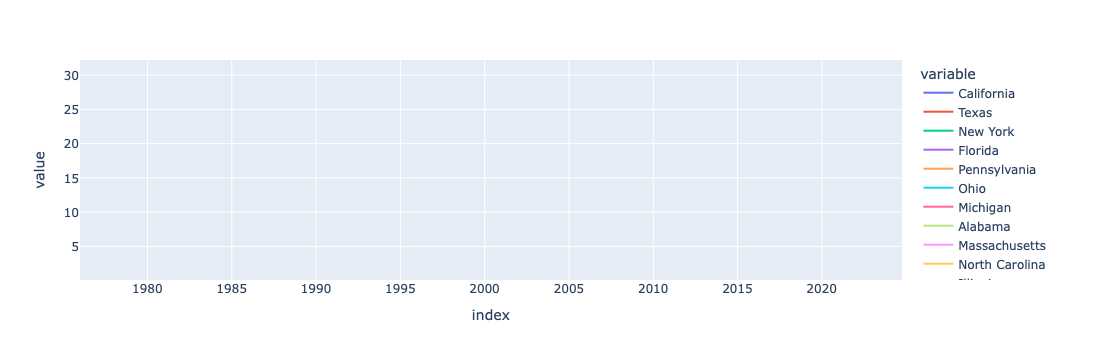

In [231]:
px.line(Unemp_states)

# Pull April 2020 Unemployment rate per State

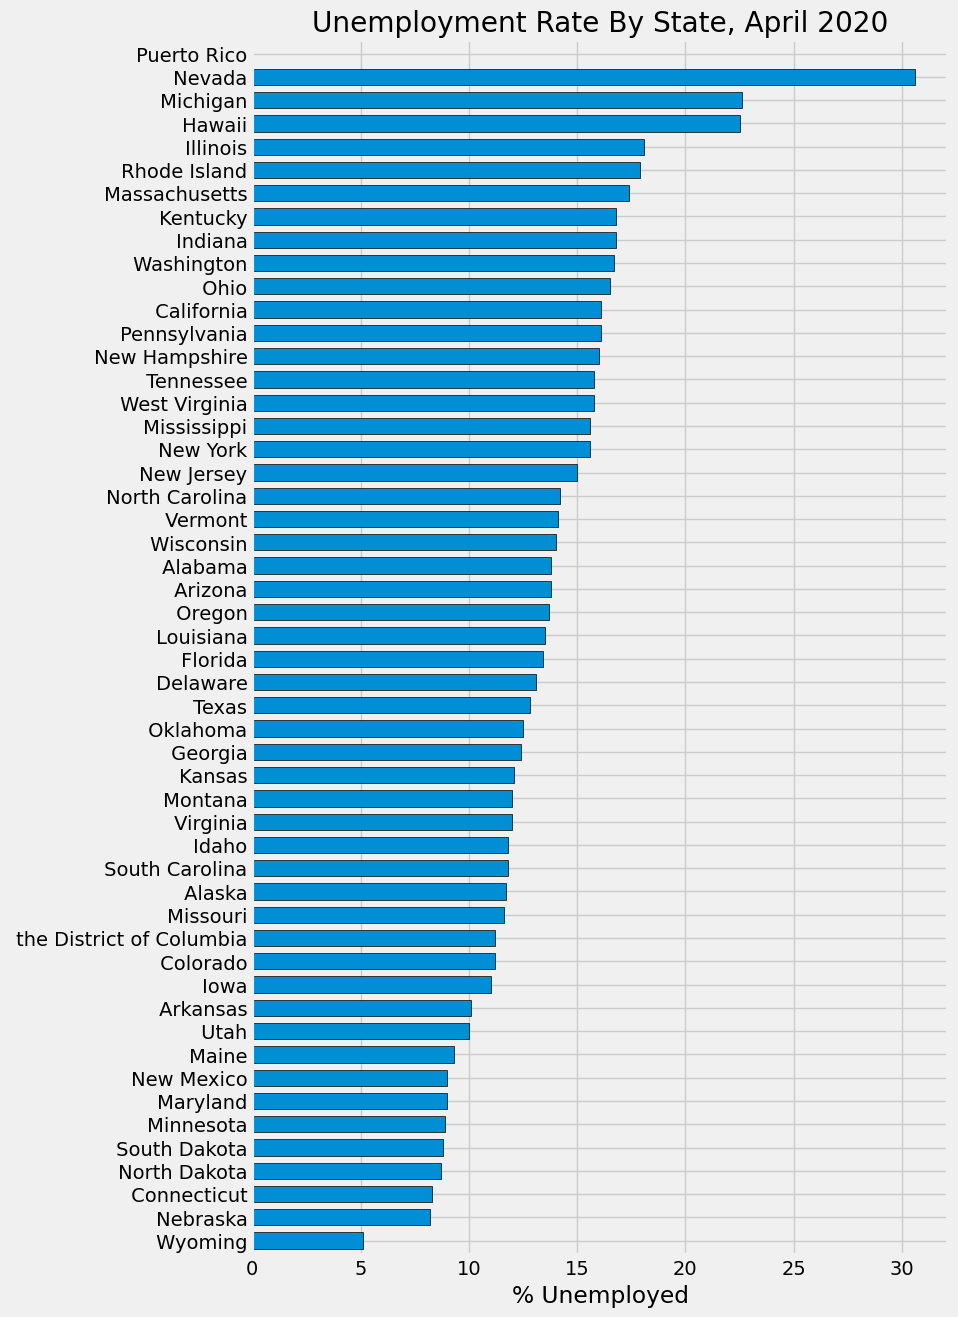

In [109]:
ax= Unemp_states.loc[Unemp_states.index=='2020-04-01'].T.sort_values('2020-04-01') \
            .plot(kind='barh',figsize=(8,15), title='Unemployment Rate By State, April 2020',width=0.7,edgecolor='black')

ax.set_xlabel('% Unemployed')
ax.legend().remove()

# Pull Participation Rate

In [208]:
part_df=fred.search('participation rate state',filter=('frequency','Monthly'))
part_df=part_df.query('seasonal_adjustment =="Seasonally Adjusted" and units=="Percent" and id.str.len()==7')

In [210]:
part_id_to_state=part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

In [212]:
all_results2=[]

for my_id in part_df.index:
    results2=fred.get_series(my_id)
    results2=results2.to_frame(name=my_id)
    all_results2.append(results2)

In [214]:
all_results2.pop(0)

CIVPART
1948-01-01     58.6
1948-02-01     58.9
1948-03-01     58.5
1948-04-01     59.0
1948-05-01     58.3
...             ...
2024-06-01     62.6
2024-07-01     62.7
2024-08-01     62.7
2024-09-01     62.7
2024-10-01     62.6

[922 rows x 1 columns]

In [216]:
part_states=pd.concat(all_results2,axis=1)

In [218]:
part_states.columns=[part_id_to_state[c] for c in part_states.columns] 

# Unemployment vs Participation

Text(0.5, 1.0, 'New York')

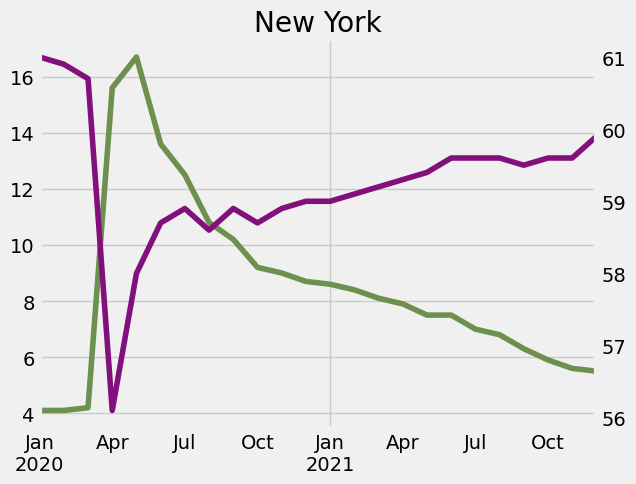

In [247]:
fig, ax=plt.subplots()
ax2=ax.twinx()

Unemp_states.query('index>=2020 and index<2022')['New York'].plot(ax=ax,label='Unemployment',color=color_pal[3])
part_states.query('index>=2020 and index<2022')['New York'].plot(ax=ax2,label='Participation',color=color_pal[5])

ax2.grid(False)

ax.set_title('New York')

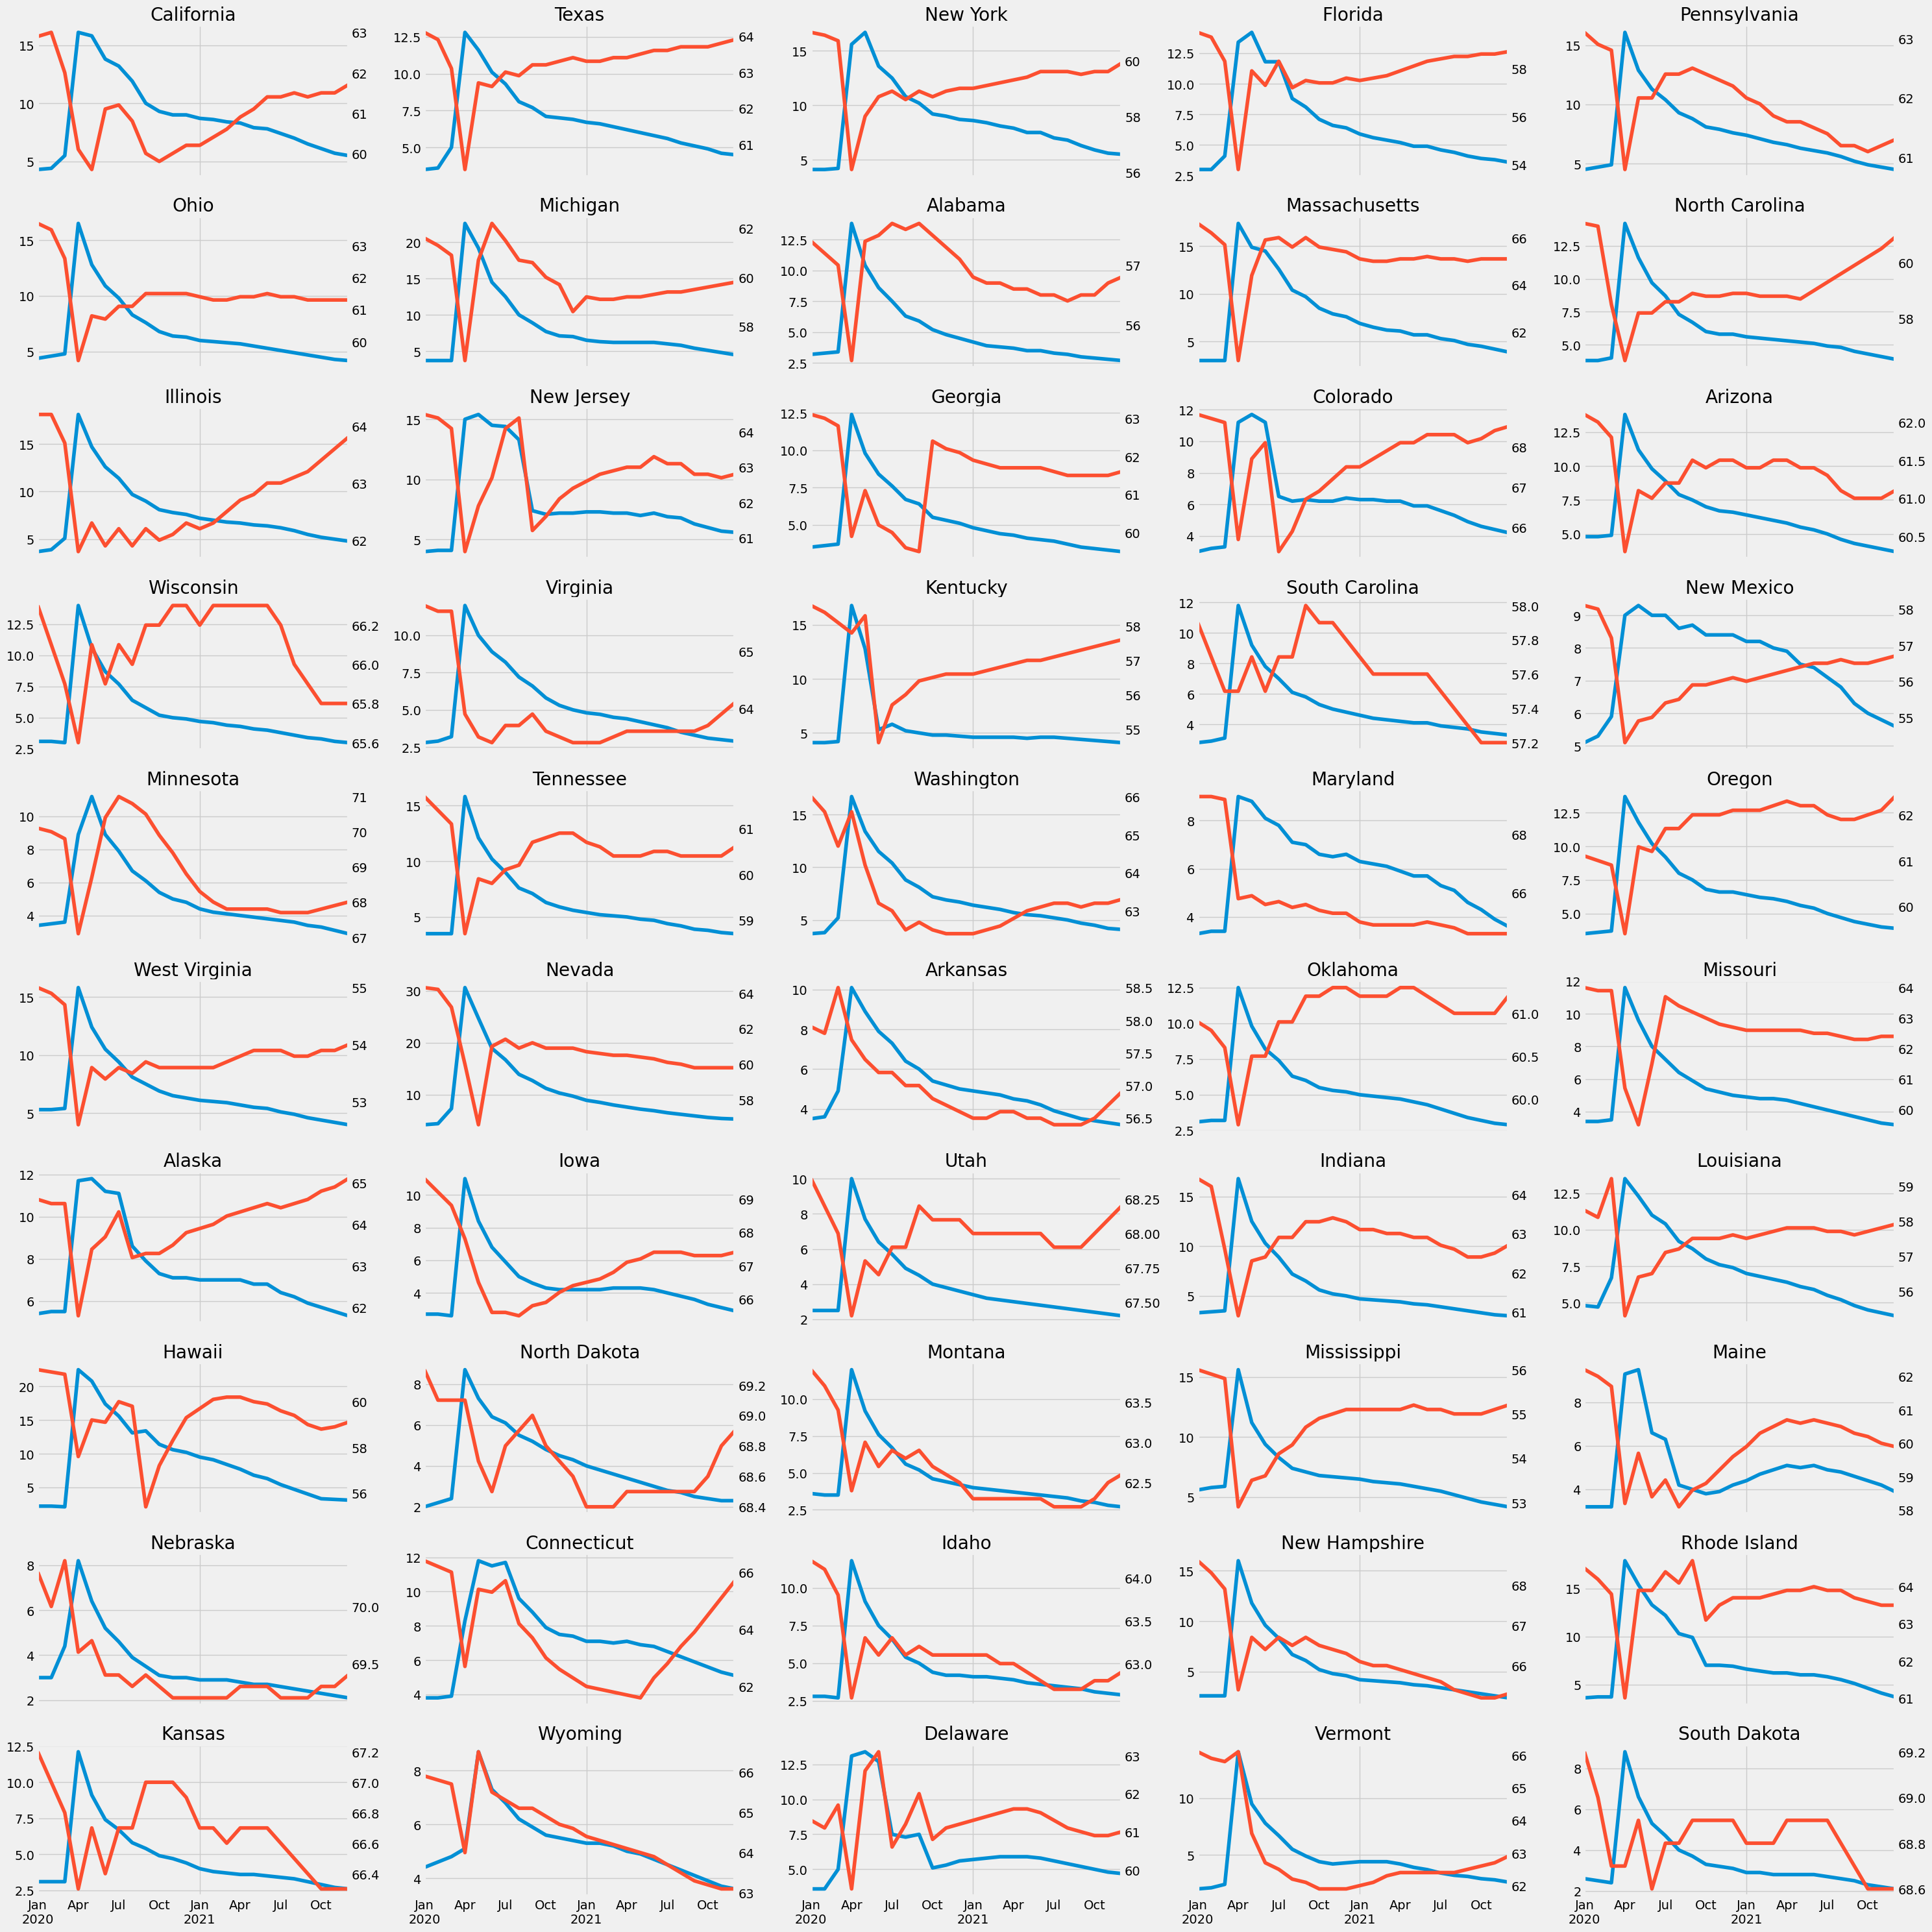

In [243]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in Unemp_states.columns:
    if state=='Puerto Rico' or state=='the District of Columbia':
       continue
    ax2 = axs[i].twinx()
    Unemp_states.query('index >= 2020 and index < 2022')[state].plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1])

    ax2.grid(False)
    axs[i].set_title(state)
    i += 1

plt.tight_layout()
plt.show() 